In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from pypalettes import load_cmap
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Active Storage are included in the folder 'ReservoirsOriginal'

reservoirID = [2,3,4,5,6,7,8,9,11,13,14,16,17,18,19,20,21,22,24,25,26,28,29,36,37,101,108,109]

year = {}
os.chdir('ReservoirsOriginal')
# Iterate through the vector
for i in reservoirID:
    # Create the file name
    nome_file = f"res{i}.txt"

    # Open the file and read the lines
    with open(nome_file, 'r') as file:
        file.readline()  
        riga = file.readline().strip()  

    
    elements = riga.split()

    # Extract the required values (active storage and start year of operation) 
     
    year[i] = int(elements[6])   
os.chdir('..')   

In [3]:
# Function to interpolate a colormap using cubic interpolation:
def interpolate_cmap(cmap, num_interp_points):
    new_colors = cmap(np.linspace(0, 1, cmap.N))  # Ottieni i colori della colormap discreta
    new_cmap = LinearSegmentedColormap.from_list('my_interpolated_cmap', new_colors, N=num_interp_points)
    return new_cmap

In [4]:
# In Results folder (1-16) we have the results of the paragraph 'Cumulative Dam Impacts on 3S Sediment Flow'
num_folders = 16
num_columns = 7
num_rows = 8401  # Not used here but included for reference
outsed = np.zeros((num_folders, 23))

# Loop through folders
for folder_idx in range(1, num_folders + 1):
    folder_name = f'Results{folder_idx}'
    
    # Change directory to the folder
    os.chdir(folder_name)
    
    # Read the CSV file containing the annual sediment loads
    totsedyear = np.loadtxt('totsedyear.csv', delimiter=',')  # Use pandas if needed
    outsed[folder_idx - 1, :] = totsedyear[:]  # Adjusted for 0-based indexing
    
    # Return to the parent directory
    os.chdir('..')

# Create the years vector
yearsed = np.arange(2000, 2023)  
yearcap = np.arange(2000, 2023)

# Calculate medians and confidence intervals of annual sediment loads over the 16 scenarios
medians = np.median(outsed, axis=0)
conf_intervals = np.zeros((23, 2))
for i in range(23):
    conf_intervals[i, :] = np.percentile(outsed[:, i], [25, 75])


In [5]:

# Active Storage are included in the folder 'ReservoirsOriginal'
vettore = [9, 8, 7, 6, 5, 4, 3, 37, 36, 2, 29, 28, 26, 25, 24, 22, 21, 20, 19, 18, 17, 16, 14, 13, 11, 101, 108, 109]

# Initialize storage and year dictionaries
storage = {}
year = {}
os.chdir('ReservoirsOriginal')
# Iterate through the vector
for i in vettore:
    # Create the file name
    nome_file = f"res{i}.txt"

    # Open the file and read the lines
    with open(nome_file, 'r') as file:
        file.readline()  
        riga = file.readline().strip()  

    
    elementi = riga.split()

    # Extract the required values (active storage and start year of operation) 
    storage[i] = float(elementi[2])  
    year[i] = int(elementi[6])       

# Initialize years and cumulative storage arrays
anni = np.arange(1985, 2024)
cumulative_storage = np.zeros((3, len(anni)))

# Iterate through the years
for idx, current_year in enumerate(anni):
    
    cumulative_storage_year = np.zeros(3)

    # Iterate through the reservoirs
    for reservoir_id in vettore:
        # Check if the current year is greater than the reservoir's start year
        if current_year > year[reservoir_id]:
            if reservoir_id in [101, 7, 20, 11, 8, 9, 21, 109, 108]:
                cumulative_storage_year[0] += storage[reservoir_id]
            elif reservoir_id in [36, 37, 13, 14, 16, 17, 18]:
                cumulative_storage_year[1] += storage[reservoir_id]
            else:
                cumulative_storage_year[2] += storage[reservoir_id]

    # Assign cumulative storage for the current year
    cumulative_storage[:, idx] = cumulative_storage_year

# Convert cumulative storage to desired units (km³)
cumulative_storage = cumulative_storage * 1000 / 1e9



# Sum of cumulative storage
ActiveStorage = cumulative_storage.sum(axis=0)
os.chdir('..')

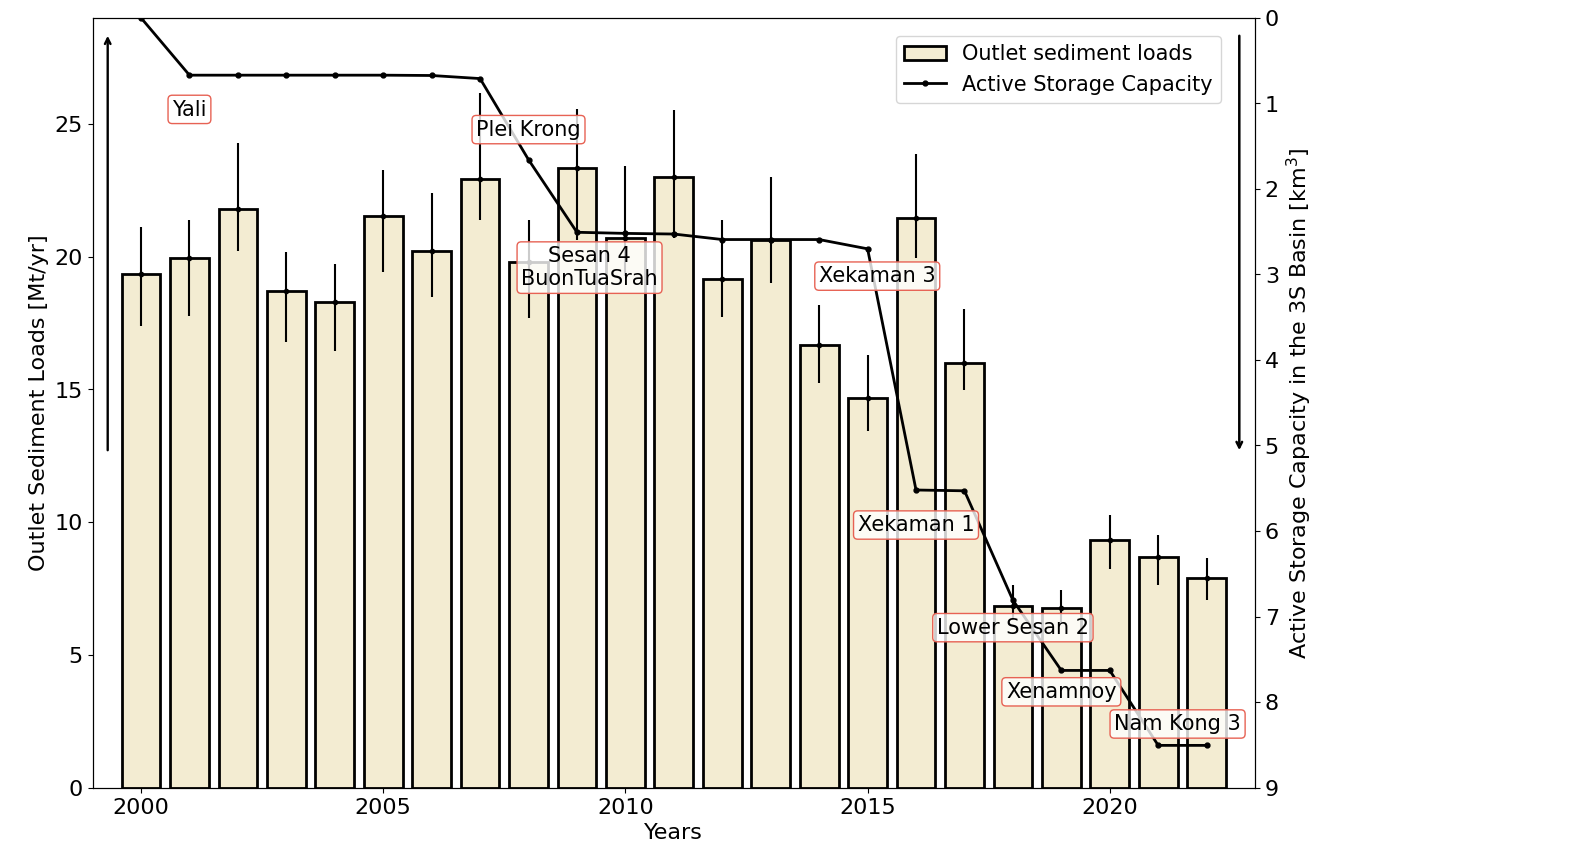

In [6]:
# Plot of Figure 2 


cmap = load_cmap("Hiroshige")
cmap = interpolate_cmap(cmap, 1000)
fig = plt.figure(figsize=(15, 10))

# Left y-axis
#plt.bar(yearsed[:], medians[:], edgecolor=cmap(0.98,1), facecolor=cmap(0.465,0.7), linewidth=2, label='Mediana')
bar_plot = plt.bar(yearsed[:], medians[:], edgecolor='black', facecolor=cmap(0.465,0.7), linewidth=2, label='Mediana')
error_plot = plt.errorbar(yearsed[:], medians[:], yerr=[medians[:] - conf_intervals[:,0], conf_intervals[:,1] - medians[:]], 
             fmt='.', color='k', linewidth=1.5, label='Intervallo di confidenza')

plt.xlabel('Years',fontsize=16)
plt.ylabel('Outlet Sediment Loads [Mt/yr]',fontsize=16)
plt.xlim([1999, 2023])
plt.ylim([0, 29])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.gca().yaxis.label.set_color(cmap(0.98))
plt.gca().yaxis.label.set_color('black')
# Right y-axis
plt.twinx()

#plt.plot(yearcap[:], ActiveStorage[-23:], '-o', color=cmap(1), linewidth=1.5, 
#         markersize=3, markerfacecolor=cmap(1))
line_plot, = plt.plot(yearcap[:], ActiveStorage[-23:], '-o', color='black', linewidth=2, 
         markersize=3.5, markerfacecolor='black')
plt.ylabel('Active Storage Capacity in the 3S Basin [km$^3$]',fontsize=16)
plt.ylim([0, 9])
#plt.gca().yaxis.label.set_color(cmap(1))
plt.gca().yaxis.label.set_color('black')
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)

#plt.annotate(annotation.items()['text'])
#for pos, text_info in annotations.items():
plt.annotate('Yali', (2001, ActiveStorage[39 - 2022 + 2001] + 0.4),
                 xytext=(2001, ActiveStorage[2001 + 39 - 2022] + 0.4),
                 fontsize=15, ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor=[1, 1, 1 ,0.8], edgecolor=cmap(1,1)))

plt.annotate('Plei Krong', (2008, ActiveStorage[39 - 2022 + 2008] - 1.2),
                 xytext=(2008, ActiveStorage[2008 + 39 - 2022] - 1.2),
                 fontsize=15, ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor=[1, 1, 1 ,0.8], edgecolor=cmap(1,1)))

plt.annotate('Sesan 4\nBuonTuaSrah', (2009.26, ActiveStorage[39 - 2022 + 2009] + 0.4),
                 xytext=(2009.26, ActiveStorage[2009 + 39 - 2022] + 0.4),
                 fontsize=15, ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor=[1, 1, 1 ,0.8], edgecolor=cmap(1,1)))

plt.annotate('Xekaman 3', (2015.2, ActiveStorage[39 - 2022 + 2015] - 2.5),
                 xytext=(2015.2, ActiveStorage[2015 + 39 - 2022] - 2.5),
                 fontsize=15, ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor=[1, 1, 1 ,0.8], edgecolor=cmap(1,1)))

plt.annotate('Xekaman 1', (2016, ActiveStorage[39 - 2022 + 2016] + 0.4),
                 xytext=(2016, ActiveStorage[2016 + 39 - 2022] + 0.4),
                 fontsize=15, ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor=[1, 1, 1 ,0.8], edgecolor=cmap(1,1)))

plt.annotate('Lower Sesan 2', (2018, ActiveStorage[39 - 2022 + 2018] - 0.5),
                 xytext=(2018, ActiveStorage[2018 + 39 - 2022] - 0.5),
                 fontsize=15, ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor=[1, 1, 1 ,0.8], edgecolor=cmap(1,1)))

plt.annotate('Nam Kong 3', (2021.4, ActiveStorage[39 - 2022 + 2021] -0.25),
                 xytext=(2021.4, ActiveStorage[2021 + 39 - 2022] - 0.25),
                 fontsize=15, ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor=[1, 1, 1 ,0.8], edgecolor=cmap(1,1)))

plt.annotate('Xenamnoy', (2019, ActiveStorage[39 - 2022 + 2019] + 0.25),
                 xytext=(2019, ActiveStorage[2019 + 39 - 2022] + 0.25),
                 fontsize=15, ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=0.2', facecolor=[1, 1, 1 ,0.8], edgecolor=cmap(1,1)))


# Adding arrow annotation
#plt.annotate('', xy=(0.8142, 0.82), xytext=(0.8142, 0.3), xycoords='figure fraction',
#             arrowprops=dict(arrowstyle='<-', color=cmap(1), linewidth=2))
plt.annotate('', xy=(0.8262, 0.82), xytext=(0.8262, 0.4), xycoords='figure fraction',
             arrowprops=dict(arrowstyle='<-', color='black', linewidth=1.8))
plt.annotate('', xy=(0.0718, 0.82), xytext=(0.0718, 0.4), xycoords='figure fraction',
             arrowprops=dict(arrowstyle='->', color='black', linewidth=1.7))
# Adding the legend
plt.legend(handles=[bar_plot, line_plot], 
           labels=['Outlet sediment loads', 'Active Storage Capacity'], bbox_to_anchor=(0.98, 0.99), fontsize=15)
fig.savefig('Figure2.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)